In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Признаки:  
- Pregnancies — количество беременностей.  
- Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
- BloodPressure — диастолическое артериальное давление (мм рт. ст.).
- SkinThickness — толщина кожной складки трицепса (мм).
- Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
- BMI — индекс массы тела (вес в кг/рост в м)
- DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
- Age — возраст.
- Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

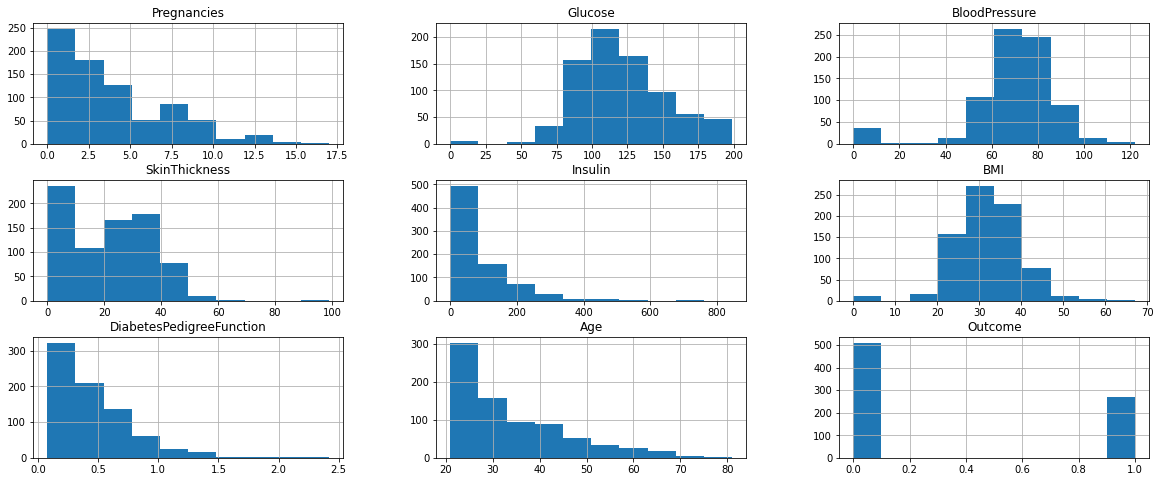

In [5]:
cols = diabetes.columns
diabetes[cols].hist(figsize=(20, 8));

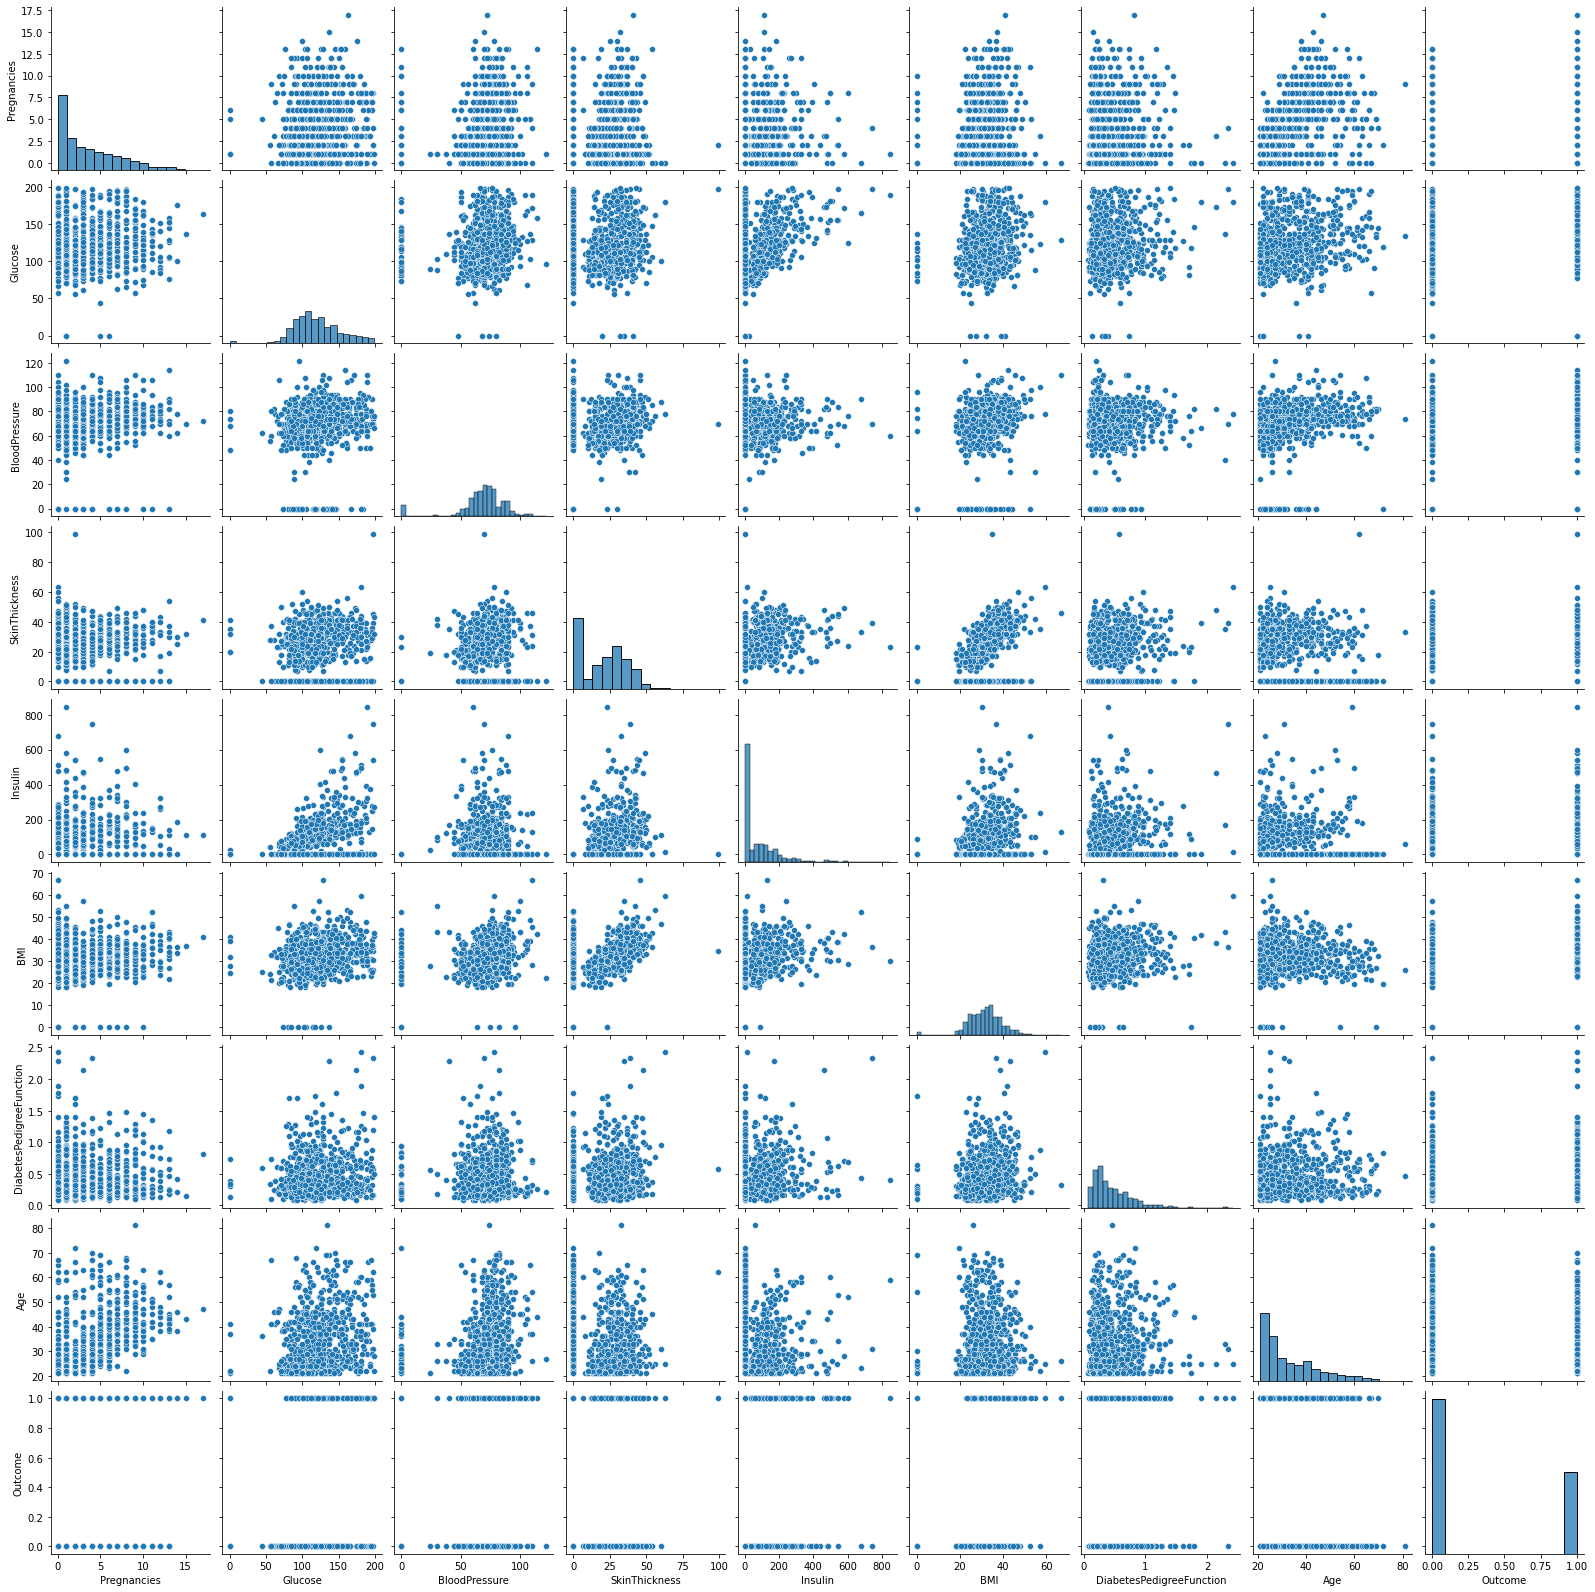

In [4]:
sns.pairplot(diabetes)

Задание 8.1  
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [8]:

mask = diabetes.duplicated(subset=cols)
data = diabetes[mask]
data.shape[0]

10

In [12]:
diabetes_dedup = diabetes.drop_duplicates(subset=cols)
diabetes_dedup.shape[0]

768

Задание 8.2  
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [19]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedup.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedup[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedup[col].nunique() / diabetes_dedup[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [20]:
diabetes_clean = diabetes_dedup.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_clean.shape[1]}')

Результирующее число признаков: 9


Задание 8.3  
Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!  
Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.  
Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [22]:
diabetes_clean.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [25]:
cols_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_list:
    diabetes_clean[col].replace(0, np.nan, inplace=True)

diabetes_clean.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

Задание 8.4  
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [27]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes_clean.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes_clean = diabetes_clean.dropna(thresh=thresh, axis=1)

diabetes_clean.shape

(768, 8)

Задание 8.5  
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [28]:
#удаляем записи, в которых есть хотя бы 1 пропуск
diabetes_clean = diabetes_clean.dropna(thresh=6, axis=0)
diabetes_clean.shape

(761, 8)

Задание 8.6  
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [31]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Glucose': diabetes_clean['Glucose'].median(),
    'BloodPressure': diabetes_clean['BloodPressure'].median(),
    'SkinThickness': diabetes_clean['SkinThickness'].median(),
    'BMI': diabetes_clean['BMI'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
diabetes_clean = diabetes_clean.fillna(values)
#выводим результирующую долю пропусков
diabetes_clean['SkinThickness'].mean()

29.109067017082786

In [32]:
# создам копию
diabetes_fin = diabetes_clean.copy()

Задание 8.7  
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [33]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [34]:
outliers, cleaned = outliers_iqr(diabetes_fin, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


Задание 8.8  
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [35]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [37]:
outliers, cleaned = outliers_z_score(diabetes_fin, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


Задание 8.9  
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [39]:
outliers_pedigree, cleaned = outliers_iqr(diabetes_fin, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers_pedigree.shape[0]}')


Число выбросов по методу Тьюки: 29


Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [40]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score(diabetes_fin, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')


Число выбросов по методу z-отклонения: 0


In [2]:
from outliers_lib.find_outliers import new_function


ModuleNotFoundError: No module named 'outliers_lib.find_outliers'